# 효율적 투자 전략
* 대상 종목 : 주식, 채권

In [2]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings(action='ignore')
sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)



# 주식과 채권을 몇대 몇으로해야 최대의 수익을 낼 수 있는가?

In [21]:
sdf = pd.read_csv("../datasets/kodex_stock.csv")
bdf = pd.read_csv("../datasets/kodex_bond10y.csv")

In [22]:
sdf.shape, bdf.shape

((1845, 6), (1845, 6))

In [23]:
sdf=sdf.set_index('dt')
bdf=bdf.set_index('dt')

In [24]:
sdf['daily_rate']=sdf['close'].pct_change()
bdf['daily_rate']=bdf['close'].pct_change()

sdf['s_log_rate']=np.log(1+sdf['daily_rate'])
bdf['b_log_rate']=np.log(1+bdf['daily_rate'])

In [25]:
stock_annual_rate=sdf['s_log_rate'].mean()*252
bond_annual_rate=bdf['b_log_rate'].mean()*252

In [27]:
total=sdf[['s_log_rate']]
total['b_log_rate']=bdf['b_log_rate']
total

,s_log_rate,b_log_rate
dt,,
2012-01-20,NaN,NaN
2012-01-25,0.000000,0.003443
2012-01-26,-0.000601,0.000953
2012-01-27,0.001401,0.001527
2012-01-30,0.002597,-0.011300
...,...,...
2019-07-17,0.002179,-0.008959
2019-07-18,0.006369,-0.002206
2019-07-19,0.001464,0.013892


In [42]:
annual_ret = total.mean()   * 252
annual_cov = total.cov() * 252

port_ret     = [] 
port_risk    = [] 
port_weights = [] 
port_sharp   = [] 
stocks = total.columns

for _ in range(20000): 
    weights = np.random.random(len(stocks)) 
    weights = weights / np.sum(weights) 

    #------------------- 수익률, 리스크(편차), 샤프지수 -----------------------
    returns = np.dot(weights, annual_ret) 
    risk    = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) 
    sharp   =  returns / risk
    
    port_ret.append(returns) 
    port_risk.append(risk) 
    port_weights.append(weights) 
    port_sharp.append(sharp) 
    
    
portfolio = {'Returns': port_ret, 'Risk': port_risk,'Sharp':port_sharp,'weights':port_weights} 
for i, s in enumerate(stocks): 
    portfolio[s] = [weight[i] for weight in port_weights]  # portfolio[s] : s를 키값으로 각각의 weight 값들이 들어감
print(portfolio.keys())

dict_keys(['Returns', 'Risk', 'Sharp', 'weights', 's_log_rate', 'b_log_rate'])


In [43]:
df = pd.DataFrame(portfolio) 
df.head()

,Returns,Risk,Sharp,weights,s_log_rate,b_log_rate
0,0.034496,0.075777,0.455233,"[0.41231305159819487, 0.5876869484018052]",0.412313,0.587687
1,0.033906,0.078610,0.431320,"[0.38891171770255994, 0.61108828229744]",0.388912,0.611088
2,0.026020,0.118808,0.219011,"[0.07633619586376592, 0.9236638041362341]",0.076336,0.923664
3,0.036418,0.066858,0.544709,"[0.4884896555117748, 0.5115103444882252]",0.488490,0.511510
4,0.048523,0.042161,1.150885,"[0.9682789381385584, 0.03172106186144169]",0.968279,0.031721


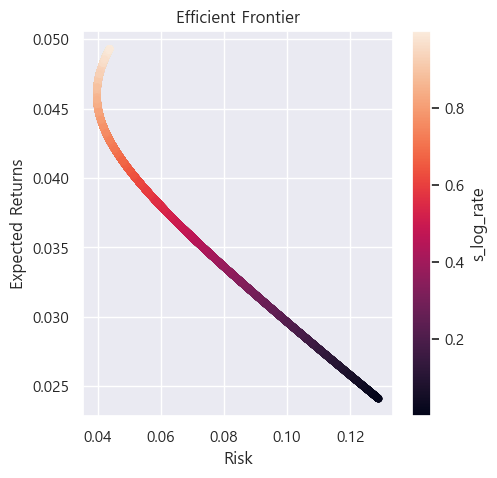

In [53]:
df.plot.scatter(x='Risk', y='Returns', figsize=(5, 5), grid=True,c='s_log_rate')
plt.title('Efficient Frontier') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show() 

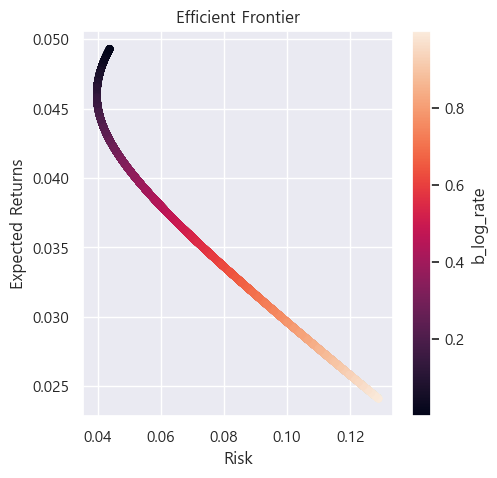

In [49]:
df.plot.scatter(x='Risk', y='Returns', figsize=(5, 5), grid=True,c='b_log_rate')
plt.title('Efficient Frontier') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show() 

In [36]:
df.columns

Index(['Returns', 'Risk', 'Sharp', 'weights', 's_log_rate', 'b_log_rate'], dtype='object')

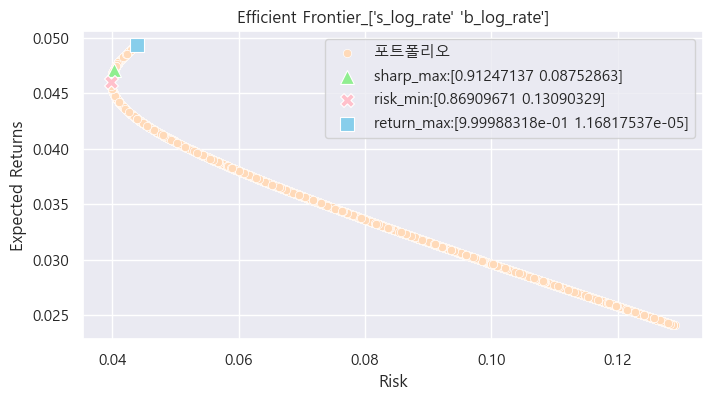

In [95]:
# 샤프치수   최대 포트
sharp_max = df[df['Sharp'] == df['Sharp'].max()]
# 위험리스크 최소 포트
risk_min  = df[df['Risk'] == df['Risk'].min()] 
# 수익률     최대 포트
return_max = df[df['Returns'] == df['Returns'].max()] 

plt.figure(figsize=(8,4))
sns.scatterplot(data=df        , x='Risk', y='Returns' ,color='peachpuff'                 , label=f"포트폴리오") # palevioletred 
sns.scatterplot(data=sharp_max , x='Risk', y='Returns', marker="^", c='lightgreen',s=100, label=f"sharp_max:{sharp_max['weights'].values[0]}")
sns.scatterplot(data=risk_min  , x='Risk', y='Returns', marker="X", c='pink',s=100, label=f"risk_min:{risk_min['weights'].values[0]}")
sns.scatterplot(data=return_max, x='Risk', y='Returns', marker="s", c='skyblue',s=100, label=f"return_max:{return_max['weights'].values[0]}")

plt.title(f'Efficient Frontier_{stocks.values}') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show() 

In [96]:
print(sharp_max)
print(risk_min)
print(return_max)

       Returns      Risk     Sharp                                   weights  \
7252  0.047115  0.040234  1.171008  [0.912471372275203, 0.08752862772479683]   

      s_log_rate  b_log_rate  
7252    0.912471    0.087529  
      Returns      Risk     Sharp                                    weights  \
1290  0.04602  0.039765  1.157325  [0.8690967139954242, 0.13090328600457576]   

      s_log_rate  b_log_rate  
1290    0.869097    0.130903  
       Returns      Risk     Sharp  \
8142  0.049323  0.043854  1.124715   

                                           weights  s_log_rate  b_log_rate  
8142  [0.9999883182462557, 1.1681753744370135e-05]    0.999988    0.000012  
